# Lab #2
#### Billy Parmenter - 7526387
## Part A

In [54]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
import numpy as np


In [55]:
data = pd.read_csv('../../practical_labs/Lab2_dataset.csv', header=0, names=['index','label', 'text', 'label_num'])#, index_col='index')
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
y.value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

## Multinomial

In [57]:

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
labels = model.predict(X_test)
labels

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

Text(46.25, 0.5, 'predicted label')

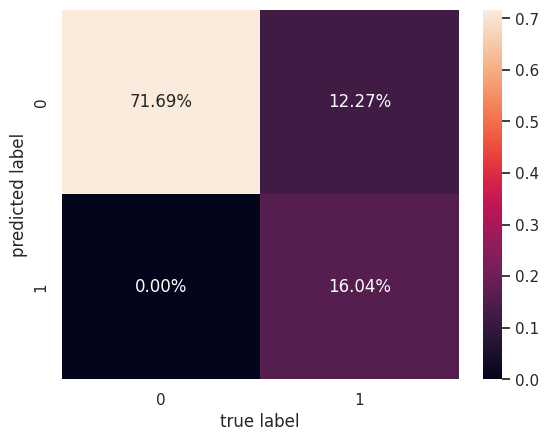

In [59]:
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T/np.sum(mat.T), annot=True, fmt='.2%')
plt.xlabel('true label')
plt.ylabel('predicted label')